In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
sns.set_style("whitegrid")

% matplotlib inline

In [2]:
def modificar_valor_simulacao(nome_diretorio):
    posicao = nome_diretorio.rfind('_')
    posicao += 1
    return nome_diretorio[posicao:]

def obter_interfmodel(item):
    interfModel = item[12]
    return interfModel

def obter_node(item):
    node = item[19]
    return node

In [3]:
# arquivo de interesse
FILE = 'packet_breakdown.txt' 
colunas = ['InterfModel,node',
           'Falha, estouro de buffer',
           'Falha, canal ocupado',
           'Falha, sem ACK',
           'Sucesso, primeira tentativa',
           'Sucesso, mais de uma tentativa']

# obtem uma lista de todos arquivos e subdiretorios do diretorio atual
folders = os.listdir()
folders.sort()

# Data Frame com todos os dados.
DATA = pd.DataFrame()

# captura dos dados 
for folder in filter(lambda x: path.isdir(x),folders):
    os.chdir(folder)
    if path.isfile(FILE):
        simulacao = modificar_valor_simulacao(folder)
        dfPRR = pd.read_csv(FILE,delimiter='|',names=colunas)
        dfPRR['Modelo de colisao'] = dfPRR['InterfModel,node'].apply(obter_interfmodel)
        dfPRR['nó'] = dfPRR['InterfModel,node'].apply(obter_node)
        dfPRR['simulacao'] = simulacao
        DATA = DATA.append(dfPRR,ignore_index=True)
        print('coletado dados de ->\t',folder)
    os.chdir('../')

coletado dados de ->	 simulacao_4.0.0_PA
coletado dados de ->	 simulacao_4.0.1_PB
coletado dados de ->	 simulacao_4.2.1_CLBin_p=0.1
coletado dados de ->	 simulacao_4.2.2_CLBin_p=0.2
coletado dados de ->	 simulacao_4.2.3_CLBin_p=0.3
coletado dados de ->	 simulacao_4.2.4_CLBin_p=0.4
coletado dados de ->	 simulacao_4.2.5_CLBin_p=0.5
coletado dados de ->	 simulacao_4.2.6_CLBin_p=0.6
coletado dados de ->	 simulacao_4.2.7_CLBin_p=0.7
coletado dados de ->	 simulacao_4.2.8_CLBin_p=0.8
coletado dados de ->	 simulacao_4.2.9_CLBin_p=0.9


In [4]:
col = ['Falha, estouro de buffer',
       'Falha, canal ocupado',
       'Falha, sem ACK',
       'Sucesso, primeira tentativa',
       'Sucesso, mais de uma tentativa']

DATA['total de pacotes'] = DATA[col].sum(axis=1)
DATA['Estouro de buffer'] = (DATA['Falha, estouro de buffer'] / DATA['total de pacotes']) * 100
DATA['Canal ocupado'] = (DATA['Falha, canal ocupado'] / DATA['total de pacotes']) * 100
DATA['Sem recebimento ACK'] = (DATA['Falha, sem ACK'] / DATA['total de pacotes']) * 100

DATA['PRR, primeira tentativa'] = (DATA['Sucesso, primeira tentativa'] / DATA['total de pacotes']) * 100
DATA['PRR, mais de uma tentativa'] = (DATA['Sucesso, mais de uma tentativa'] / DATA['total de pacotes']) * 100

In [5]:
DATA.sample(5)

,"InterfModel,node","Falha, estouro de buffer","Falha, canal ocupado","Falha, sem ACK","Sucesso, primeira tentativa","Sucesso, mais de uma tentativa",Modelo de colisao,nó,simulacao,total de pacotes,Estouro de buffer,Canal ocupado,Sem recebimento ACK,"PRR, primeira tentativa","PRR, mais de uma tentativa"
146,"InterfModel=2,node=2",0.00,19.75,9.08,2358.20,610.79,2,2,p=0.8,2997.82,0.000000,0.658812,0.302887,78.663829,20.374472
100,"InterfModel=2,node=1",0.00,18.28,139.14,2045.74,794.22,2,1,p=0.5,2997.38,0.000000,0.609866,4.642054,68.250939,26.497141
91,"InterfModel=0,node=2",0.00,19.25,25.94,2209.65,743.08,0,2,p=0.5,2997.92,0.000000,0.642112,0.865267,73.706103,24.786519
162,"InterfModel=2,node=3",0.47,18.54,108.99,3361.87,1004.45,2,3,p=0.9,4494.32,0.010458,0.412521,2.425061,74.802640,22.349321
13,"InterfModel=2,node=4",1287.91,97.95,205.99,5022.14,854.20,2,4,PA,7468.19,17.245276,1.311563,2.758232,67.247084,11.437845


In [6]:
DATA.dtypes

InterfModel,node                   object
Falha, estouro de buffer          float64
Falha, canal ocupado              float64
Falha, sem ACK                    float64
Sucesso, primeira tentativa       float64
Sucesso, mais de uma tentativa    float64
Modelo de colisao                  object
nó                                 object
simulacao                          object
total de pacotes                  float64
Estouro de buffer                 float64
Canal ocupado                     float64
Sem recebimento ACK               float64
PRR, primeira tentativa           float64
PRR, mais de uma tentativa        float64
dtype: object

In [7]:
colorMAP = {
    'PA' : '#FF7F0E',
    'PB' : '#2CA02C',
    'p=0.1' : '#1F77B4',
    'p=0.2' : '#1F77B4',
    'p=0.3' : '#1F77B4',
    'p=0.4' : '#1F77B4',
    'p=0.5' : '#1F77B4',
    'p=0.6' : '#1F77B4',
    'p=0.7' : '#1F77B4',
    'p=0.8' : '#1F77B4',
    'p=0.9' : '#1F77B4'
}

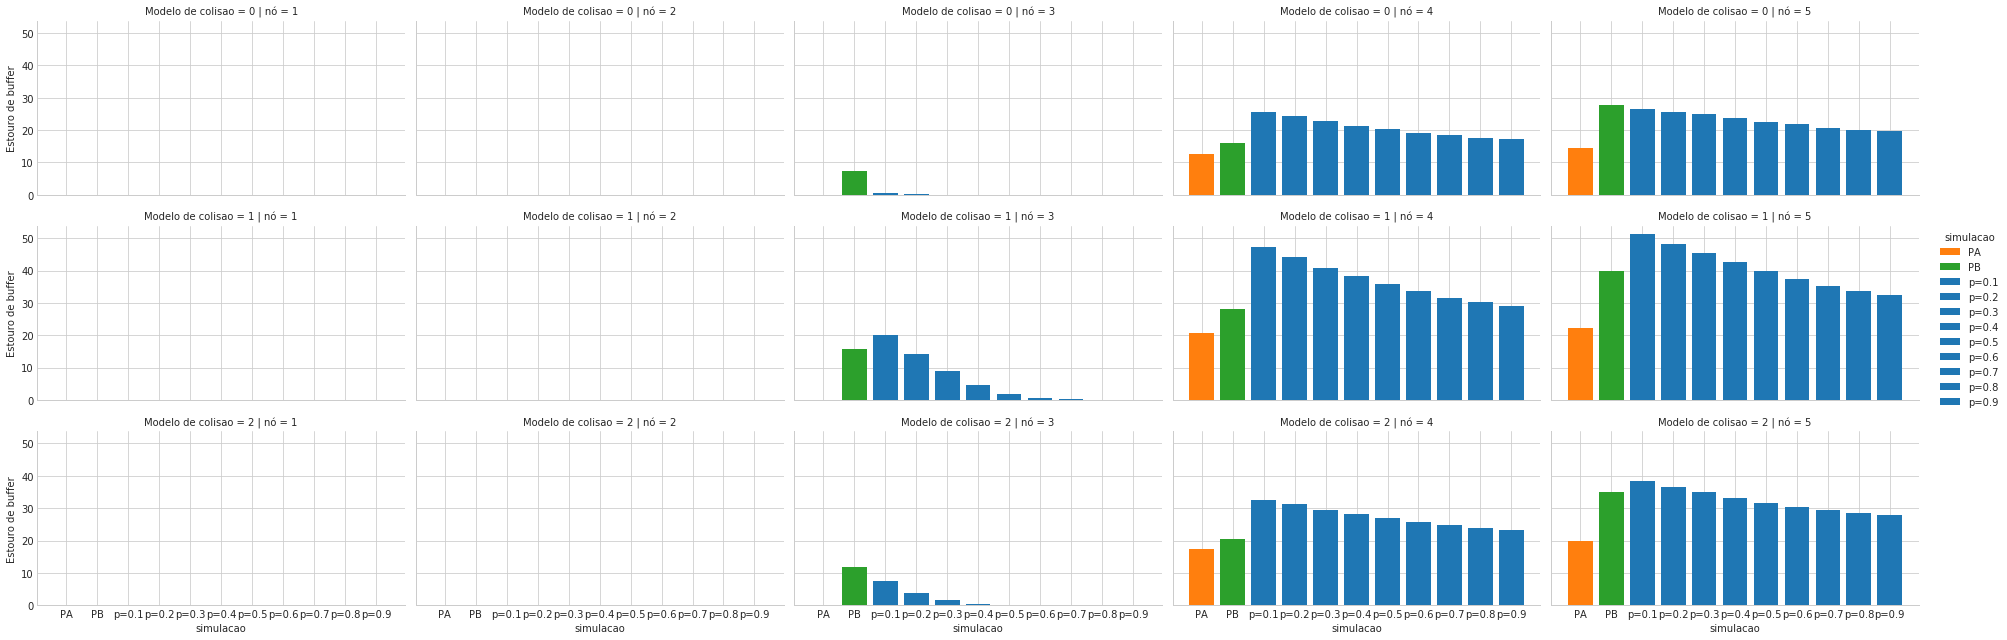

In [8]:
df = DATA

grid = sns.FacetGrid(df,
                     row='Modelo de colisao',
                     col="nó",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=True,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','Estouro de buffer')
grid.add_legend()

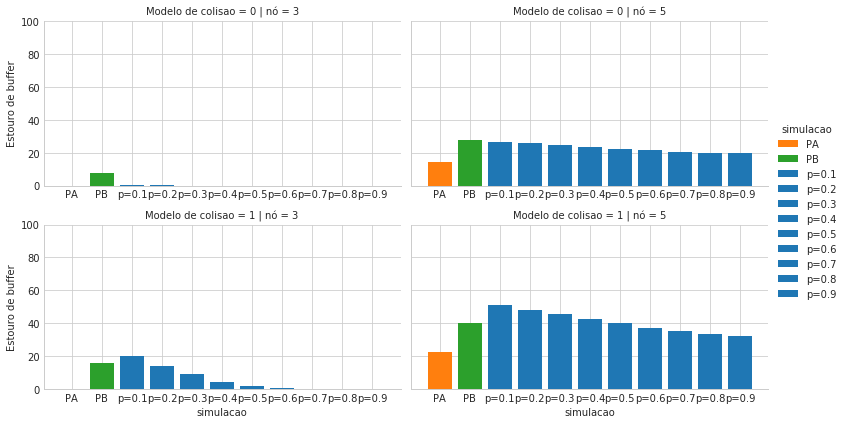

In [9]:

select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '1' ) & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

grid = sns.FacetGrid(df,
                     row='Modelo de colisao',
                     col="nó",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','Estouro de buffer')
grid.add_legend()
grid.set(ylim=(0,100))

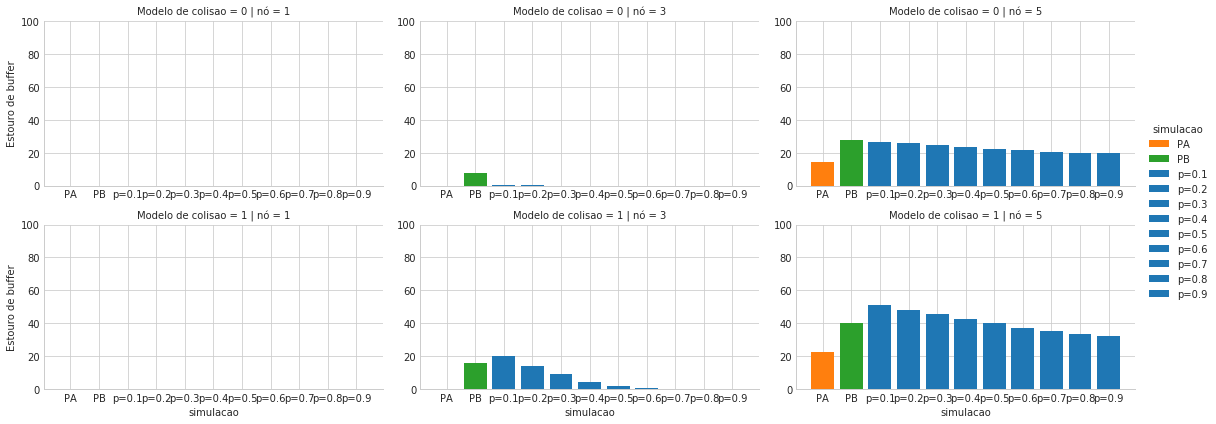

In [10]:
select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )

df = DATA[select]

grid = sns.FacetGrid(df,
                     row='Modelo de colisao',
                     col="nó",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','Estouro de buffer')
grid.add_legend()
grid.set(ylim=(0,100))

Text(0.5,1,'Cenário sem colisão')

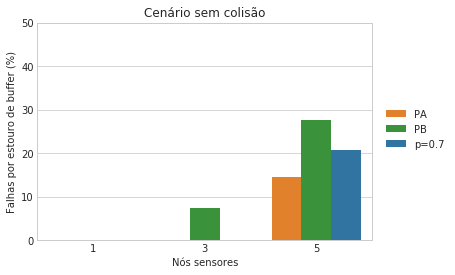

In [11]:
select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select & (df['Modelo de colisao'] == '0')]

axes = sns.barplot(x='nó',
            y='Estouro de buffer',
            hue='simulacao',
            data=df,
            palette=colorMAP
           )

axes.set(ylim=(0,50))
axes.legend(loc=(1.03,0.4))

axes.set_ylabel('Falhas por estouro de buffer (%)')
axes.set_xlabel('Nós sensores')
plt.title("Cenário sem colisão")

Text(0.5,1,'Cenário com colisão')

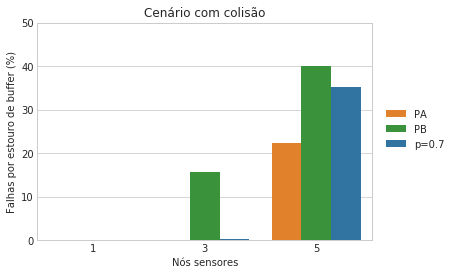

In [12]:
select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select & (df['Modelo de colisao'] == '1')]

axes = sns.barplot(x='nó',
            y='Estouro de buffer',
            hue='simulacao',
            data=df,
            palette=colorMAP
           )

axes.set(ylim=(0,50))
axes.legend(loc=(1.03,0.4))

axes.set_xlabel('Nós sensores')
axes.set_ylabel('Falhas por estouro de buffer (%)')
plt.title("Cenário com colisão")

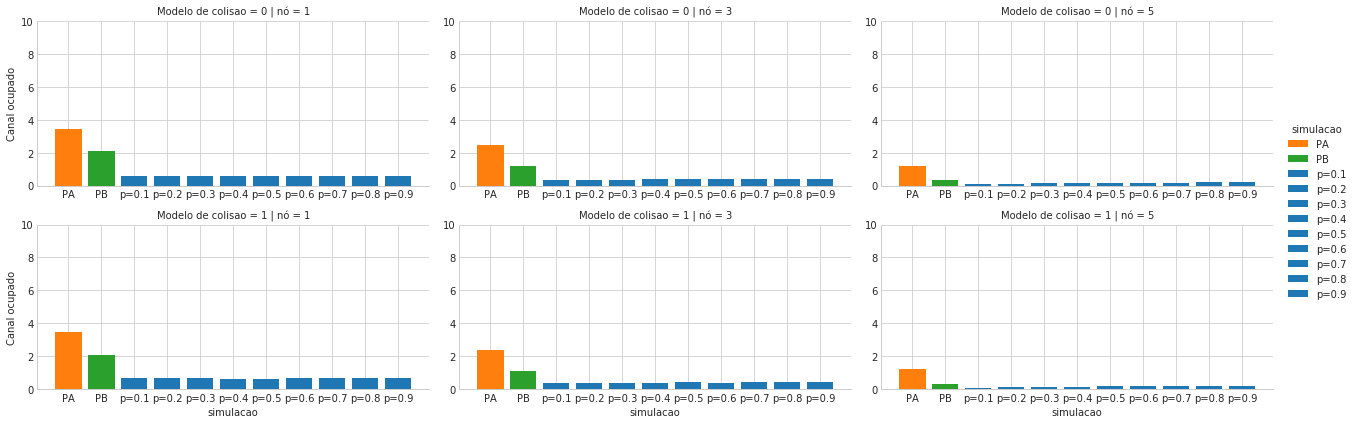

In [13]:
## Gráfico Busy channel Rate
# select = (DATA['InterfModel'] != '2' )
select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

grid = sns.FacetGrid(df,
                     row='Modelo de colisao',
                     col="nó",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','Canal ocupado')
grid.add_legend()
grid.set(ylim=(0,10))

Text(0.5,1,'Cenário sem colisão')

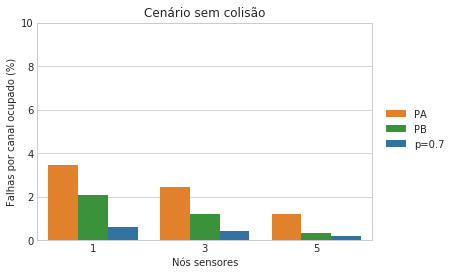

In [14]:
select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select & (df['Modelo de colisao'] == '0')]

axes = sns.barplot(x='nó',
            y='Canal ocupado',
            hue='simulacao',
            data=df,
            palette=colorMAP
           )

axes.set(ylim=(0,10))
axes.legend(loc=(1.03,0.4))

axes.set_ylabel('Falhas por canal ocupado (%)')
axes.set_xlabel('Nós sensores')
plt.title("Cenário sem colisão")

Text(0.5,1,'Cenário com colisão')

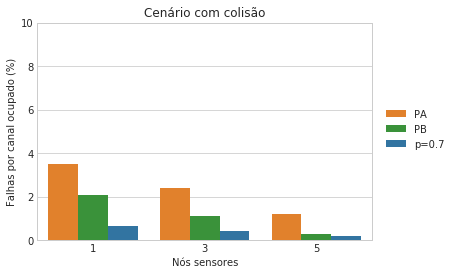

In [15]:
select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select & (df['Modelo de colisao'] == '1')]

axes = sns.barplot(x='nó',
            y='Canal ocupado',
            hue='simulacao',
            data=df,
            palette=colorMAP
           )

axes.set(ylim=(0,10))
axes.legend(loc=(1.03,0.4))

axes.set_ylabel('Falhas por canal ocupado (%)')
axes.set_xlabel('Nós sensores')
plt.title("Cenário com colisão")

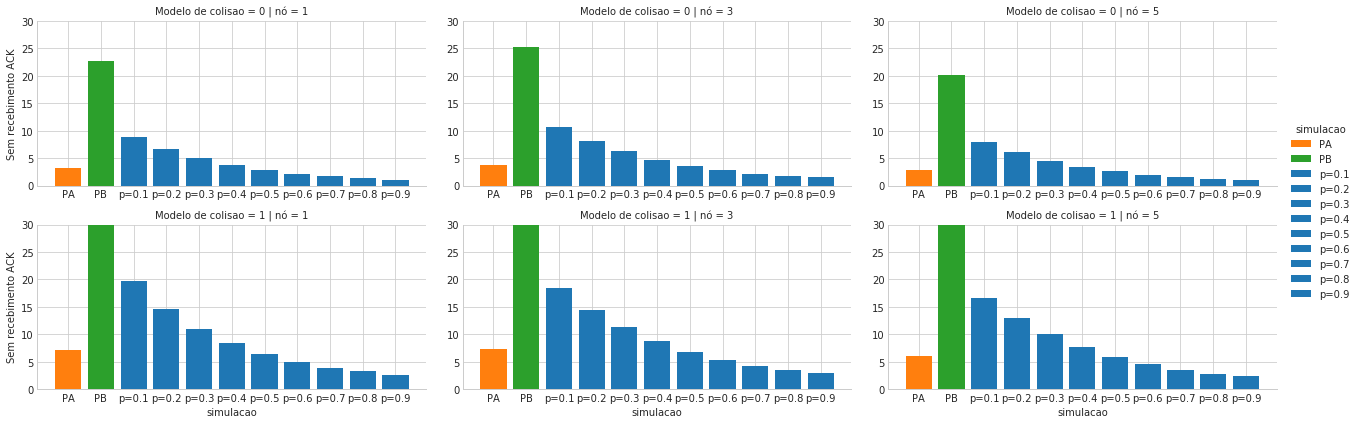

In [16]:

select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

grid = sns.FacetGrid(df,
                     row='Modelo de colisao',
                     col="nó",
                     hue="simulacao",
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','Sem recebimento ACK')
grid.add_legend()
grid.set(ylim=(0,30))

Text(0.5,1,'Cenário com colisão')

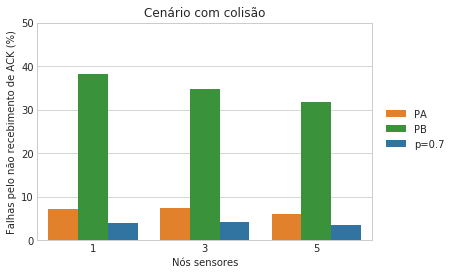

In [17]:
select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select & (df['Modelo de colisao'] == '1')]

axes = sns.barplot(x='nó',
            y='Sem recebimento ACK',
            hue='simulacao',
            data=df,
            palette=colorMAP
           )

axes.set(ylim=(0,50))
axes.legend(loc=(1.03,0.4))

axes.set_ylabel('Falhas pelo não recebimento de ACK (%)')
axes.set_xlabel('Nós sensores')
plt.title("Cenário com colisão")

Text(0.5,1,'Cenário sem colisão')

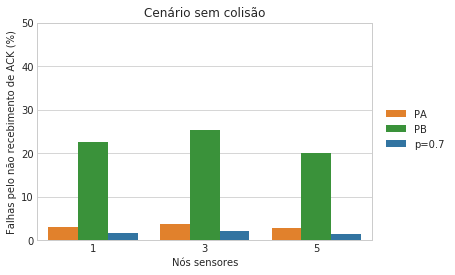

In [18]:
select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select & (df['Modelo de colisao'] == '0')]

axes = sns.barplot(x='nó',
            y='Sem recebimento ACK',
            hue='simulacao',
            data=df,
            palette=colorMAP
           )

axes.set(ylim=(0,50))
axes.legend(loc=(1.03,0.4))

axes.set_ylabel('Falhas pelo não recebimento de ACK (%)')
axes.set_xlabel('Nós sensores')
plt.title("Cenário sem colisão")

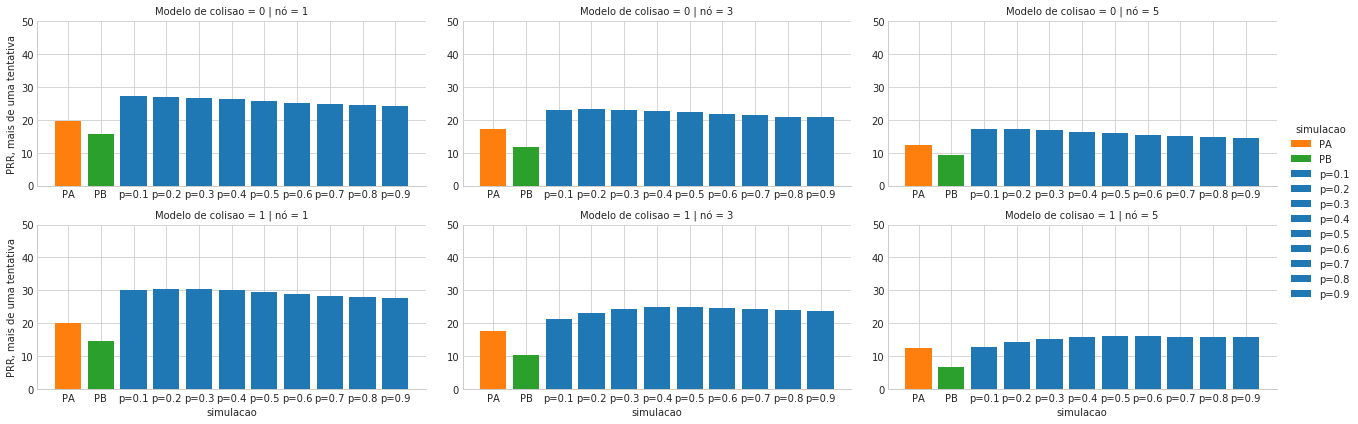

In [19]:

select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]
#df = DATA

grid = sns.FacetGrid(df,
                     row='Modelo de colisao',
                     col="nó",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','PRR, mais de uma tentativa')
grid.add_legend()
grid.set(ylim=(0,50))

Text(0.5,1,'Cenário sem colisão')

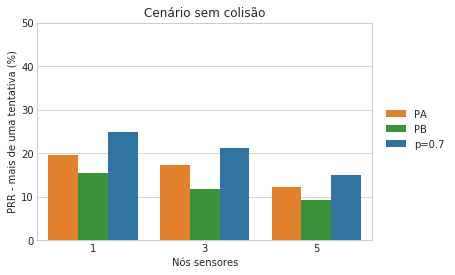

In [20]:
select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select & (df['Modelo de colisao'] == '0')]

axes = sns.barplot(x='nó',
            y='PRR, mais de uma tentativa',
            hue='simulacao',
            data=df,
            palette=colorMAP
           )
axes.set(ylim=(0,50))
axes.legend(loc=(1.03,0.4))

axes.set_ylabel('PRR - mais de uma tentativa (%)')
axes.set_xlabel('Nós sensores')
plt.title("Cenário sem colisão")

Text(0.5,1,'Cenário com colisão')

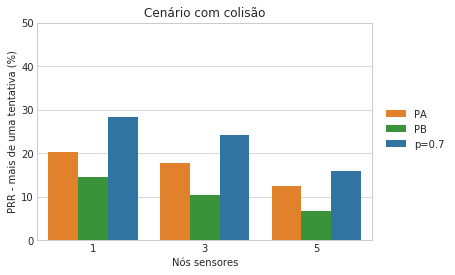

In [21]:
select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select & (df['Modelo de colisao'] == '1')]

axes = sns.barplot(x='nó',
            y='PRR, mais de uma tentativa',
            hue='simulacao',
            data=df,
            palette=colorMAP
           )

axes.set(ylim=(0,50))
axes.legend(loc=(1.03,0.4))

axes.set_ylabel('PRR - mais de uma tentativa (%)')
axes.set_xlabel('Nós sensores')
plt.title("Cenário com colisão")

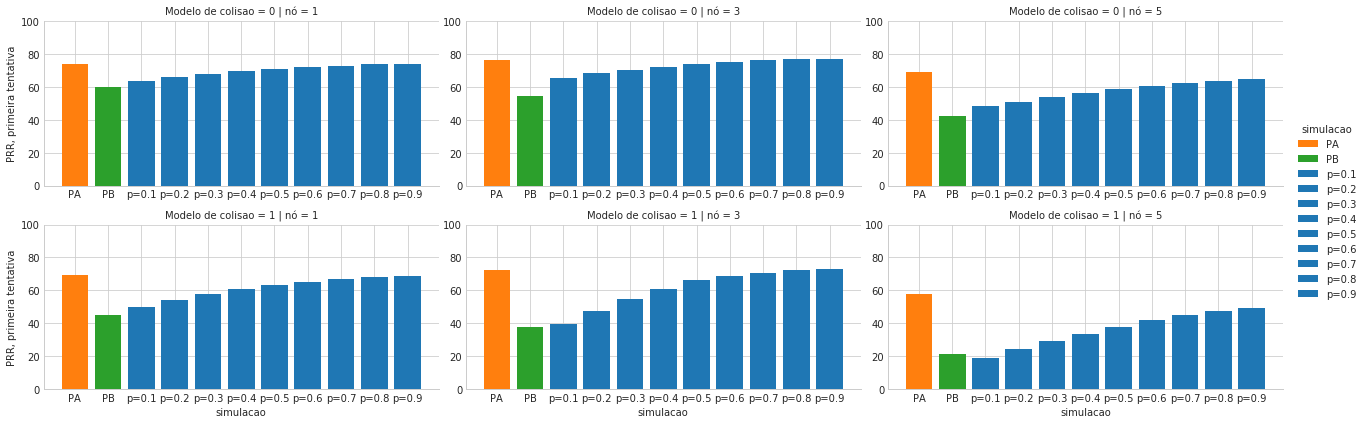

In [22]:

select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

grid = sns.FacetGrid(df,
                     row='Modelo de colisao',
                     col="nó",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','PRR, primeira tentativa')
grid.add_legend()
grid.set(ylim=(0,100))

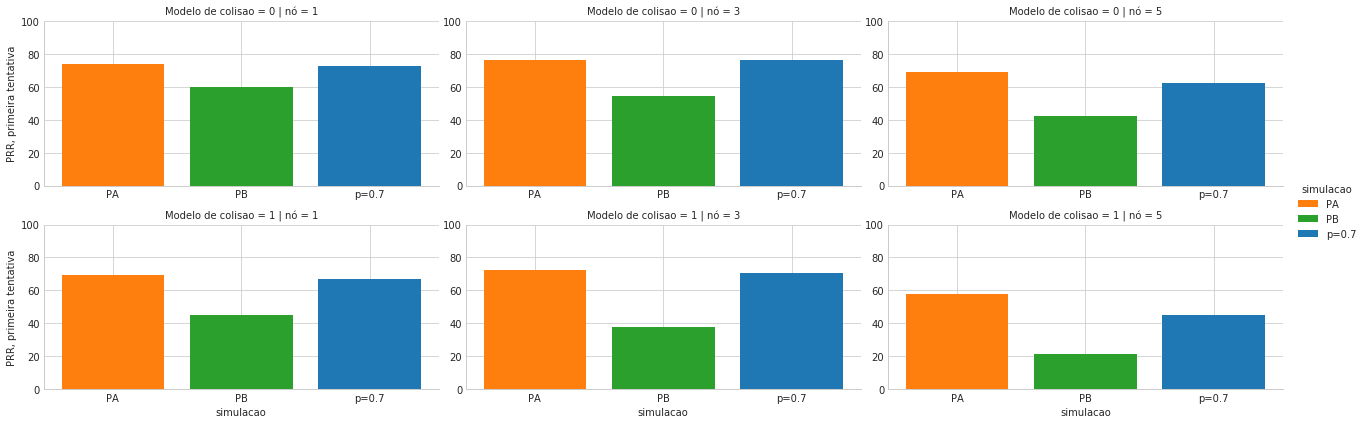

In [23]:
select = (DATA['Modelo de colisao'] != '2') & (DATA['nó'] != '2' ) & (DATA['nó'] != '4' )
df = DATA[select]

select = (df['simulacao'] == 'PA') | (df['simulacao'] == 'PB') | (df['simulacao'] == 'p=0.7')
df = df[select]

grid = sns.FacetGrid(df,
                     row='Modelo de colisao',
                     col="nó",
                     hue='simulacao',
                     palette=colorMAP,
                     legend_out=True,
                     sharex=False,
                     sharey=False,
                     aspect=2
                    )

grid.map(plt.bar,'simulacao','PRR, primeira tentativa')
grid.add_legend()
grid.set(ylim=(0,100))